# Portuguese Bank Project <a id='PBP_Header'></a>

## Table of Contents <a id='Table_of_Contents'></a>
* [Portuguese Bank Project](#PBP_Header)
  * [Table of Contents](#Table_of_Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load The Data](#Load_Data)
  * [Explore The Data](#Explore_The_Data)
    * [Attribute Information](#Attribute_information)
    * [Splitting the Data](#Splitting_The_Data)
  * [Exploratory Data Analysis](#Exploratory_Data_Analysis)
      * [Age Analysis](#Age_Analysis)
      * [Making Pie Chart](#Making_Pie_Chart)
      * [Making Feature Plots](#Making_Feature_Plots)
      * [Heat Map](#Heat_Map)
      * [Feature Importance](#Feature_Importance)
          * [Random Forest Feature Importance Results](#Feature_Importance_Results)
   * [Model Selection](#Model_Selection)
      * [Random Forest Model](#Random_Forest_Model)
      * [Logistic Regression Model](#Logistic_Regression_Model)
      * [XGBoost Model](#XGBoost_Model)
  * [Determining Profit Curve](#Determining_Profit_Curve)
  * [Summary](#Summary)


## Introduction <a class="anchor" id="Introduction"></a>

## Import relevant packages <a class="anchor" id="Imports"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import PercentFormatter

from pathlib import Path
import seaborn as sns
import scipy.stats as ss

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

## Load the data from csv file  <a class="anchor" id="Load_Data"></a>

In [2]:
raw_df = pd.read_csv('bank-full.csv', header= 0, delimiter= ";")


## Explore The Data <a class="anchor" id="Explore_The_Data"></a>


In [3]:
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
raw_df.shape

(45211, 17)

In [5]:
raw_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
raw_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Attribute Information: <a class="anchor" id="Attribute_Information"></a>

Input variables:
#### bank client data:
1. age (numeric) 
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


#### Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: 'yes','no')

Defining the two major kinds of column types for the EDA: numerical (num_col) and categorical (cat_col) data types. The categorical data also includes boolean categories.

In [8]:
num_col = ['age', "balance", 'day', 'duration', 'campaign', 'previous']
cat_col = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan', 'pdays_cat', 'y_bool']
features = ['age', "balance", 'day', 'campaign', 'previous', 'job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan', 'pdays_cat', 'random']

In [9]:
# Cutting the pdays numeric into bins
num_of_days = pd.cut(raw_df.pdays, bins=[-2, 0, 120, 365, 9999], labels=['no contact', '3 months', '1 year', 'more than 1 year'])
num_of_days.value_counts()

no contact          36954
1 year               5715
3 months             1899
more than 1 year      643
Name: pdays, dtype: int64

In [10]:
raw_df['pdays_cat'] = num_of_days
raw_df = raw_df.astype({'pdays_cat': str})

changing the output variable y to numeric values

In [11]:
outcome = raw_df['y']
outcome.replace('no', 0, inplace=True)
outcome.replace('yes', 1, inplace=True)
outcome.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [12]:
raw_df['y_bool'] = outcome
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,no contact,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,no contact,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,no contact,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,no contact,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,no contact,0


In [13]:
# adding a customer id column for processing later
raw_df['cust_id'] = raw_df.index
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool,cust_id
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,no contact,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,no contact,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,no contact,0,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,no contact,0,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,no contact,0,4


In [14]:
# checking for null values
raw_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
pdays_cat    0
y_bool       0
cust_id      0
dtype: int64

In [15]:
# double checking everything looks okay
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
 17  pdays_cat  45211 non-null  object
 18  y_bool     45211 non-null  int64 
 19  cust_id    45211 non-null  int64 
dtypes: int64(10), object(10)
mem

### Splitting into train, test set <a class="anchor" id="Splitting_The_Data"></a>

In [16]:
# making a test size of 30% 
df_train, df_test = train_test_split(raw_df, test_size=0.3, random_state= 42)

In [17]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
df_train.shape,df_test.shape

((31647, 20), (13564, 20))

In [19]:
# checking if the output variables are similar within both the test and train sets
round(df_train.y_bool.mean(),3),round(df_test.y_bool.mean(),3)

(0.117, 0.118)

In [20]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool,cust_id
0,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,-1,0,unknown,0,no contact,0,10747
1,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,-1,0,unknown,0,no contact,0,26054
2,46,blue-collar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,-1,0,unknown,0,no contact,0,9125
3,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,119,5,success,0,3 months,0,41659
4,38,blue-collar,married,secondary,no,0,yes,no,unknown,20,may,90,1,-1,0,unknown,0,no contact,0,4443


Going forward, we will use training dataset for EDA.

## Exploratory Data Analysis <a class="anchor" id="Exploratory_Data_Analysis"></a>

In [21]:
# removing features that have been transformed from the data df
data = df_train.drop(columns=['pdays', 'y'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_cat,y_bool,cust_id
0,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,0,unknown,no contact,0,10747
1,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,0,unknown,no contact,0,26054
2,46,blue-collar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,0,unknown,no contact,0,9125
3,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,5,success,3 months,0,41659
4,38,blue-collar,married,secondary,no,0,yes,no,unknown,20,may,90,1,0,unknown,no contact,0,4443


In [22]:
# converting features into categorical and ordering for plots later
data['month'] = pd.Categorical(data['month'],
                                   categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                   ordered=True)
data['marital'] = pd.Categorical(data['marital'],
                                    categories=['single', 'married', 'divorced'], 
                                    ordered=True)
data['poutcome'] = pd.Categorical(data['poutcome'],
                                   categories=['success', 'failure', 'other', 'unknown'],
                                   ordered=True)
data['pdays_cat'] = pd.Categorical(data['pdays_cat'],
                                   categories=['no contact', '3 months', '1 year', 'more than 1 year'],
                                   ordered=True)

In [23]:
#adding specialized features for plots later
# looking at balances under 13,000 and over -4,500
data_bal = data[data['balance'] < 13000]
data_bal = data_bal[data_bal['balance'] > -4500]

# looking at durations under 1800 seconds
data_dur = data[data['duration'] < 1800]

# looking at contacts during this campaign under 25
data_cam = data[data['campaign'] < 25]

# looking at previous days under 35 days
data_pre = data[data['previous'] < 35]

In [24]:
# initial source: https://github.com/rohanML/home_credit_default_risk/blob/master/notebooks/02_Exploratory_Data_Analysis.ipynb

#To track modified features : 
# eg combine levels with few records into one level called 'Others'

modified_features = dict()

# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df

# to save plots
p = Path.cwd().parent / 'Portugese Banking Project' / 'reports' / 'figures'
suffix ='.pdf'

### Age Analysis <a class="anchor" id="Age_Analysis"></a>

In this section, we're going to look at the age feature.

In [25]:
# the maximum age in the category
data.age.max()

95

In [26]:
# Making age a categorical feature: age_cat
age_cat = []
age_col = data.age
for i in age_col:
    if i < 20:
        age_cat.append('18-19')
    elif i < 25:
        age_cat.append('20-24')
    elif i < 30:
        age_cat.append('25-29')
    elif i < 35:
        age_cat.append('30-34')        
    elif i < 40:
        age_cat.append('35-39')
    elif i < 45:
        age_cat.append('40-44')
    elif i < 50:
        age_cat.append('45-49')
    elif i < 55:
        age_cat.append('50-54')        
    elif i < 60:
        age_cat.append('55-59')
    else: # i > 60
        age_cat.append('60-95')        
        
data_age = data
data_age['age_cat'] = age_cat
data_age.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_cat,y_bool,cust_id,age_cat
0,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,0,unknown,no contact,0,10747,35-39
1,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,0,unknown,no contact,0,26054,55-59
2,46,blue-collar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,0,unknown,no contact,0,9125,45-49
3,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,5,success,3 months,0,41659,40-44
4,38,blue-collar,married,secondary,no,0,yes,no,unknown,20,may,90,1,0,unknown,no contact,0,4443,35-39


In [27]:
# making another age category, age_pop, where the bins are 15 years
age_pop = []
age_col = data.age
bins = [15, 24, 39, 54, 64, 99]
labels = ['15-24', '25-39', '40-54', '55-64', '65+']
age_pop = pd.cut(age_col, bins=bins, right = True, include_lowest=True, labels=labels)
data_age['age_pop'] = age_pop
data_age.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_cat,y_bool,cust_id,age_cat,age_pop
0,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,0,unknown,no contact,0,10747,35-39,25-39
1,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,0,unknown,no contact,0,26054,55-59,55-64
2,46,blue-collar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,0,unknown,no contact,0,9125,45-49,40-54
3,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,5,success,3 months,0,41659,40-44,40-54
4,38,blue-collar,married,secondary,no,0,yes,no,unknown,20,may,90,1,0,unknown,no contact,0,4443,35-39,25-39


In [28]:
client_age = data_age.age_pop.value_counts()
client_tot = client_age.sum(axis=0)

client_age_pct_dict = {k: v/ client_tot for k, v in client_age.items()}
client_pct = pd.Series(client_age_pct_dict)

client_age = pd.concat([client_age, client_pct], axis=1)
client_age.columns = ['Population', 'Percentage']

client_age

,Population,Percentage
25-39,15802,0.499321
40-54,11259,0.355768
55-64,3439,0.108667
15-24,574,0.018138
65+,573,0.018106


In [29]:
"""The average population values of Portugal for the years 2008, 2009, and 2010 were averaged to produce the numbers below."""

port_pop_dict = {'15-24': 1183783, '25-39': 2399055, '40-54': 2267395, '55-64': 1265694, '65+': 1902273}
port_pop = pd.Series(port_pop_dict)

port_tot = port_pop.sum(axis=0)

port_pop_pct_dict = {k: v/ port_tot for k, v in port_pop_dict.items()}
port_pct = pd.Series(port_pop_pct_dict)

port_pop = pd.concat([port_pop, port_pct], axis=1)
port_pop.columns = ['Population', 'Percentage']
port_pop

,Population,Percentage
15-24,1183783,0.131266
25-39,2399055,0.266024
40-54,2267395,0.251424
55-64,1265694,0.140349
65+,1902273,0.210937


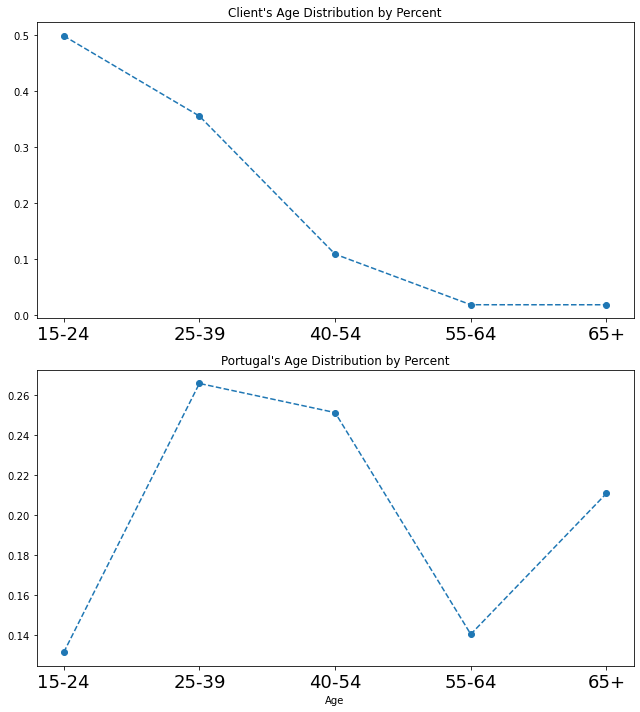

In [30]:
# Plotting each age distribution
plt.figure(figsize=(9,10))

ax1 = plt.subplot(212)
plt.plot(['15-24', '25-39', '40-54', '55-64', '65+'], port_pop['Percentage'], 'o--')
plt.title("Portugal's Age Distribution by Percent")
plt.tick_params('x', labelsize=18)
plt.xlabel('Age')

ax2 = plt.subplot(211, sharex=ax1)
plt.plot(['15-24', '25-39', '40-54', '55-64', '65+'], client_age['Percentage'], 'o--')
plt.title("Client's Age Distribution by Percent")
plt.tick_params('x', labelsize=18)

#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

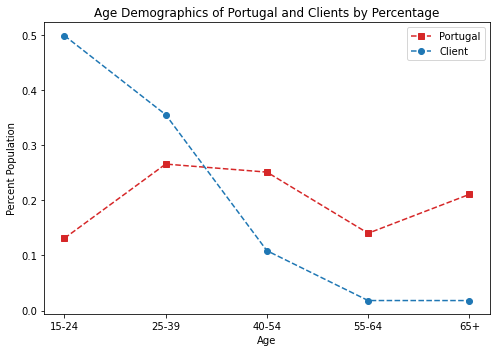

In [31]:
# plot both age demographic data on one plot

plt.figure(figsize=(7,5))

color = 'tab:red'
plt.plot(['15-24', '25-39', '40-54', '55-64', '65+'], port_pop['Percentage'], 's--', color = color)
plt.xlabel('Age')
plt.ylabel("Percent Population")

#ax2 = ax1.twinx() #instantiate a second axes that shares the same x-axis

color = 'tab:blue'
plt.plot(['15-24', '25-39', '40-54', '55-64', '65+'], client_age['Percentage'], 'o--', color=color)

title = "Age Demographics of Portugal and Clients by Percentage"
plt.title(title)
plt.legend(["Portugal", 'Client'])
plt.tight_layout()
plt.savefig(p / (title+'.pdf') )
plt.show()

#### organizing "previous" column into category

In [32]:
previous_cat = []
pre_col = data.previous
for i in pre_col:
    if i < 0.5:
        previous_cat.append('0')
    elif i < 1.5:
        previous_cat.append('1')
    elif i < 2.5:
        previous_cat.append('2')
    elif i < 3.5:
        previous_cat.append('3')        
    elif i < 4.5:
        previous_cat.append('4')
    else:
        previous_cat.append('>4')
        
data_pre = data
data_pre['prev_cat'] = previous_cat
data_pre.head()

data_pre['prev_cat'] = pd.Categorical(data['prev_cat'],
                                   categories=['0', '1', '2', '3', '4', '>4'],
                                   ordered=True)

### Making pie chart for acceptance rate <a class="anchor" id="Making_Pie_Chart"></a>

The Acceptance rate is 11.698%


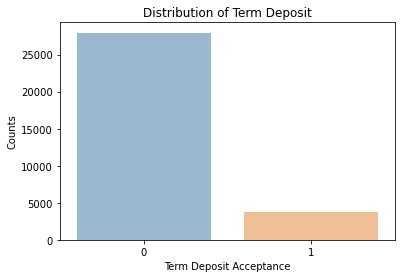

In [33]:
# making a count chart of term deposits
sns.countplot(x='y_bool',data = data, alpha=0.5)
plt.xlabel('Term Deposit Acceptance')
plt.ylabel('Counts')
plt.title('Distribution of Term Deposit');
print('The Acceptance rate is {}%'.format(round(raw_df.y_bool.mean(),5)*100))

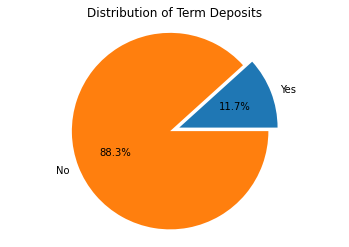

In [34]:
#making a pi chart of distribution of term deposits
acc_rate = round(raw_df.y_bool.mean(), 4)*100
labels = 'Yes', 'No'
sizes = [acc_rate, 100-(acc_rate)]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1.1f%%', startangle=0)
ax1.axis('equal')

title = "Distribution of Term Deposits"
ax1.set_title(title)
plt.savefig(p / (title+'.pdf') )
plt.show()

### Making charts for the different features vs subscription rate <a class="anchor" id="Making_Feature_Plots"></a>

In [35]:
# initial source: https://github.com/rohanML/home_credit_default_risk/blob/master/notebooks/02_Exploratory_Data_Analysis.ipynb

#To track modified features : 
# eg combine levels with few records into one level called 'Others'

modified_features = dict()

# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df

# to save plots
p = Path.cwd().parent / 'Portugese Banking Project' / 'reports' / 'figures'
suffix ='.pdf'


# To plot categorical featues.
# We plot categories on x-axis, default rate on primary y-axis & number of observations on secondary y axis.
# Plotting number of observations indicated the credibility of default rate.
def plot_default_cat_feat(df, var, var_desc, sort_by = None):
    """
    Plot default rate for different categories in the feature
    
    Keyword arguments:
    df -- DataFrame
    var -- categorical feature to be grouped by
    var_desc -- description of the feature to be displayed as label 
    sort_by -- specifies how the aggregated dataframe is sorted.  If it is
                'default_rate' -- categories are sorted by default rate in ascending order
                'count' -- categories are sorted by record counts in descending order
                None -- no sorting is done
    
    Missing values are represented by 'Missing' level.
    """

    with plt.style.context('bmh'):
        # aggregate the data
        df_grouped = df.groupby(var,dropna=False).agg({'y_bool':['mean'],'cust_id':['count']}).pipe(flatten_cols)
        df_grouped.index = df_grouped.index.fillna('Missing')

        # sorting
        if sort_by == 'count':
            df_grouped.sort_values(by='cust_id_count',ascending=False,inplace=True)
        elif sort_by == 'default_rate':
            df_grouped.sort_values(by='y_bool_mean',ascending=True,inplace=True)
        
        # plotting default rate on primary y-axis
        fig, ax = plt.subplots()
        # plt.rcParams['figure.dpi']= 480
        fontsize = 15
        # Increase the size of graph when we have more than 4 categories
        if df_grouped.shape[0] > 4:
            fig.set_size_inches(9,6)
            fontsize = 12
            plt.xticks(rotation=45, ha='right')
        ax.plot(df_grouped.index, df_grouped.y_bool_mean, 'o--', color= 'red',alpha=0.6)
        # Add value labels for dafault rates
        #source : https://stackoverflow.com/questions/59143306/add-label-values-to-bar-chart-and-line-chart-in-matplotlib
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.1%}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, 5), textcoords="offset points",
                        fontsize=fontsize,color = 'red',ha='center', va='bottom') 
            
        ax.set_title('Term Loan Subscription Rate by '+var_desc)
        ax.set_ylabel('Subscription Rate')
        ax.set_xlabel(var_desc)
        ax.set_facecolor('lavenderblush') #background color
        
        # setting the y-axis limit
        ax.set_ylim(ymin=0,ymax=df_grouped.y_bool_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        
        # plotting count of records on secondary y-axis
        ax2 = plt.twinx()
        ax2.bar(df_grouped.index,df_grouped.cust_id_count,
                    alpha=0.3, color='sandybrown')
        ax2.set_ylabel('Counts')
        ax2.grid(False)
        
        # Add legends for both y axes
        # source: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
        # https://mpltest2.readthedocs.io/en/stable/gallery/recipes/transparent_legends.html
        fig.legend(labels=('Subscription Rate','Counts'),loc='upper right',bbox_to_anchor=(1,1),
                   bbox_transform=ax.transAxes,fancybox=True, framealpha=0.2)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.savefig(p / (var_desc+'.pdf') )
        plt.show();
      
    
# To plot continuous features. We first convert continuous feature into suitable bins.
# Then we plot bins on x-axis, default rate on primary y-axis & number of observations on secondary y axis.
# Plotting number of observations indicated the credibility of default rate.


def plot_default_cont_feat(df, var, var_desc, n = 10, pct_range = (0.0,1.0), decimals = 0 ):
    """
    Plot default rate for continuous feature. We bin continuous feature & then plot default rate & count of observation.
    
    Keyword arguments:
    df -- DataFrame
    var -- categorical feature to be grouped by
    var_desc -- description of the feature to be displayed as label 
    n -- number of bins
    pct_range -- percentile range used for plotting. Values outside this range will be excluded.
    decimals -- to tune number of bins. eg if a feature has [0,1] range, then decimal is 
                atleast 2 to avoid duplicate bins.
                
    """
    df_temp = df[[var,'y_bool','cust_id']].copy()
    l_pct = pct_range[0]
    u_pct = pct_range[1]
    f_min = df_temp[var].quantile(l_pct) - 1/(10**decimals) # 0.01 added to that lower value is not excluded
    f_max = df_temp[var].quantile(u_pct) + 1/(10**decimals)
    mod_var = 'mod'+'_'+ var
    intvl = pd.interval_range(start=f_min, end= f_max, periods= n)
    # Round lower and upper limits of interval
    intvl = pd.IntervalIndex([ pd.Interval( round(i.left,decimals), 
                                round(i.right,decimals), i.closed ) for i in intvl ])
    df_temp.loc[:,mod_var]= pd.cut(df_temp[var],intvl)
    print('Count of missing observations : {}'.format(df_temp.loc[:,var].isna().sum()))
    excluded_obs = df_temp.loc[:,mod_var].isna().sum() - df_temp.loc[:,var].isna().sum()
    print('Count of excluded observations: {}'.format(excluded_obs))
    df_grouped = df_temp.groupby(mod_var,dropna=False).agg({'y_bool':['mean'],'cust_id':['count']}).pipe(flatten_cols)
    del df_temp  
    with plt.style.context('bmh'):
        # plotting default rate on primary y-axis
        fig, ax = plt.subplots()
        fig.set_size_inches(9,6)
        
        plt.xticks(rotation=45, ha='right')
        ax.plot(df_grouped.index.astype('str'), df_grouped.y_bool_mean, 'o--', color= 'red',alpha=0.6)
        ax.set_title('Term Loan Subscription Rate by '+var_desc)
        ax.set_ylabel('Subscription Rate')
        ax.set_xlabel(var_desc)
        ax.set_facecolor('lavenderblush') #background color
        
        # setting the y-axis limit
        ax.set_ylim(ymin=0,ymax=df_grouped.y_bool_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.1%}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(5, 5), textcoords="offset points",
                        fontsize=10,color = 'red',ha='center', va='bottom') 
        
        # plotting count of records on secondary y-axis
        ax2 = plt.twinx()
        ax2.bar(df_grouped.index.astype('str'),df_grouped.cust_id_count,
                    alpha=0.3, color='sandybrown')
        ax2.set_ylabel('Counts')
        ax2.grid(False)
        
        # Add legends for both y axes
        # source: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
        # https://mpltest2.readthedocs.io/en/stable/gallery/recipes/transparent_legends.html
        fig.legend(labels=('Subscription Rate','Counts'),loc='upper right',bbox_to_anchor=(1,1),
                   bbox_transform=ax.transAxes,fancybox=True, framealpha=0.2)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.savefig(p / (var_desc+'.pdf') )
        plt.show();
        
def sturge(N):
    
    """Finds the number of bins for a histogram based on Sturge's Rule.
    
    Keyword Arguments:
    N -- the number of samples in the set
    
    """
    K = 1 + 3.322* math.log(N, 10)
    return int(round(K,0))

bins = sturge(len(data))

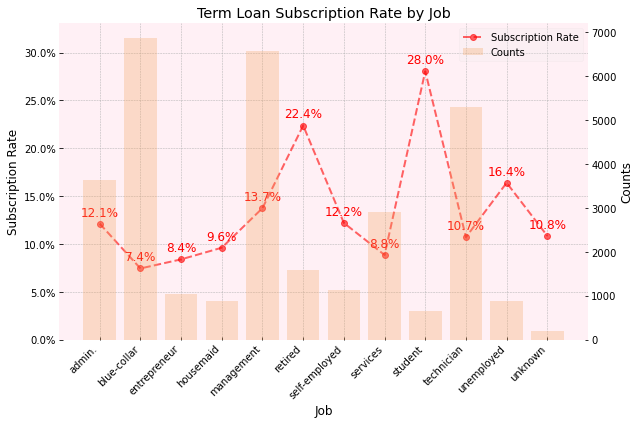

In [36]:
plot_default_cat_feat(data, 'job', 'Job')

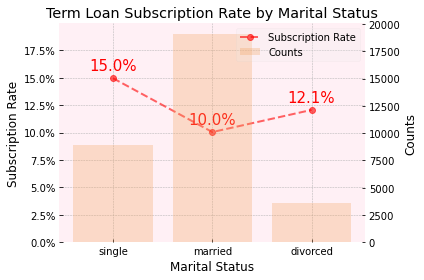

In [37]:
plot_default_cat_feat(data, 'marital', 'Marital Status')

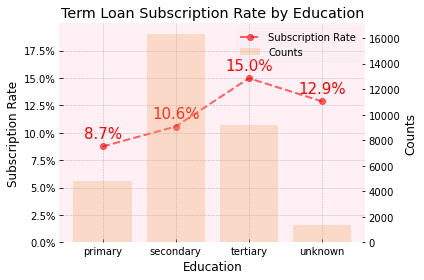

In [38]:
plot_default_cat_feat(data, 'education', 'Education')

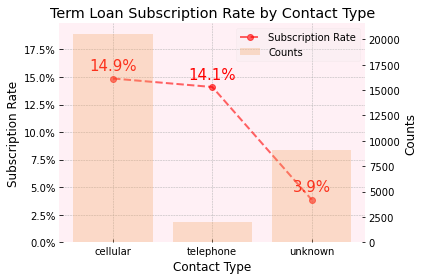

In [39]:
plot_default_cat_feat(data, 'contact', 'Contact Type')

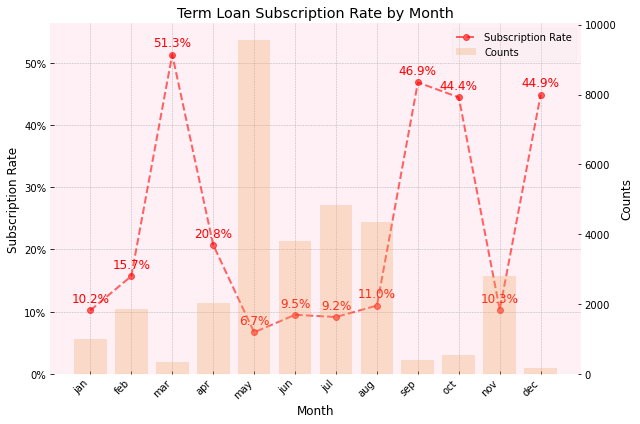

In [40]:
plot_default_cat_feat(data, 'month', 'Month')

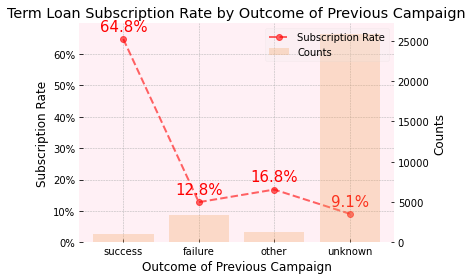

In [41]:
plot_default_cat_feat(data, 'poutcome', 'Outcome of Previous Campaign')

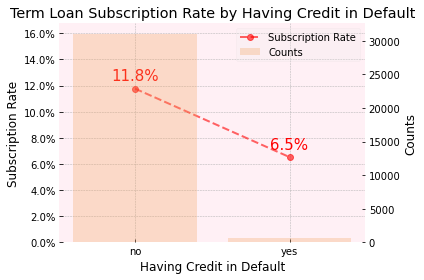

In [42]:
plot_default_cat_feat(data, 'default', 'Having Credit in Default')

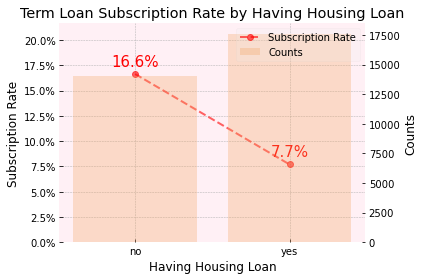

In [43]:
plot_default_cat_feat(data, 'housing', 'Having Housing Loan')

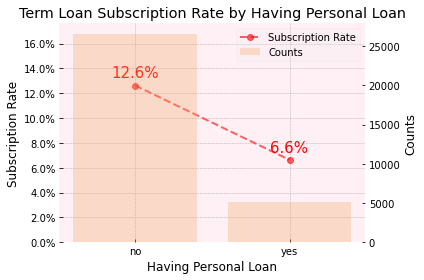

In [44]:
plot_default_cat_feat(data, 'loan', 'Having Personal Loan')

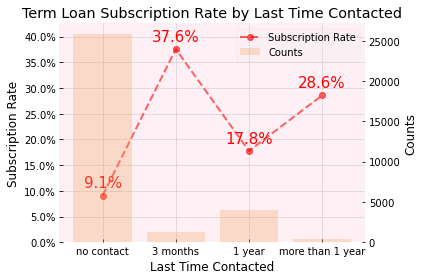

In [45]:
plot_default_cat_feat(data, 'pdays_cat', 'Last Time Contacted')

Count of missing observations : 0
Count of excluded observations: 0


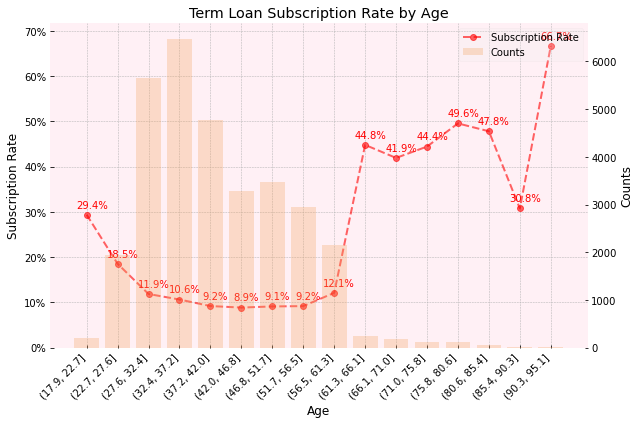

In [46]:
plot_default_cont_feat(data, 'age', "Age", n = bins, pct_range = (0.0,1.0), decimals = 1)

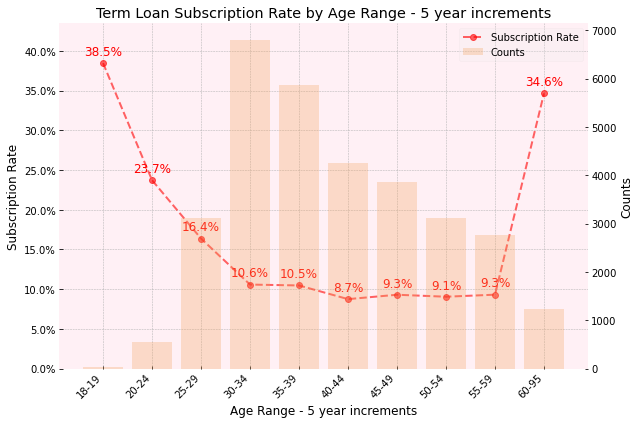

In [47]:
plot_default_cat_feat(data_age, 'age_cat', 'Age Range - 5 year increments')

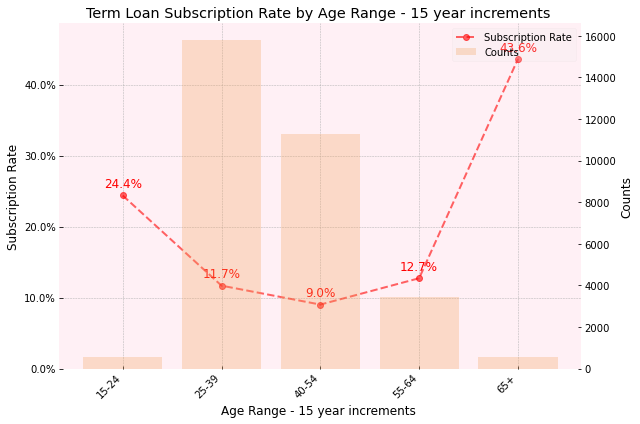

In [48]:
plot_default_cat_feat(data_age, 'age_pop', 'Age Range - 15 year increments ')

Count of missing observations : 0
Count of excluded observations: 0


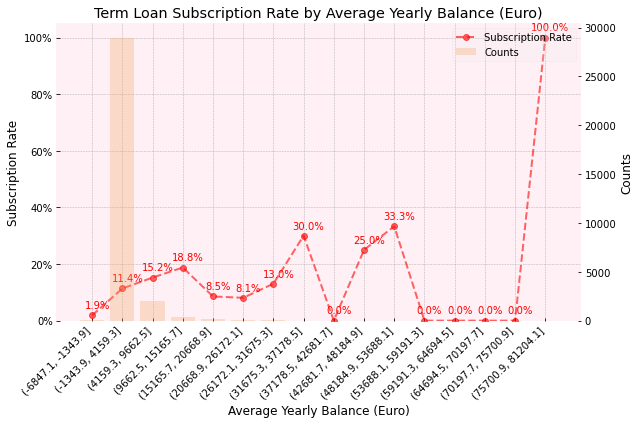

In [49]:
plot_default_cont_feat(data, 'balance', "Average Yearly Balance (Euro)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


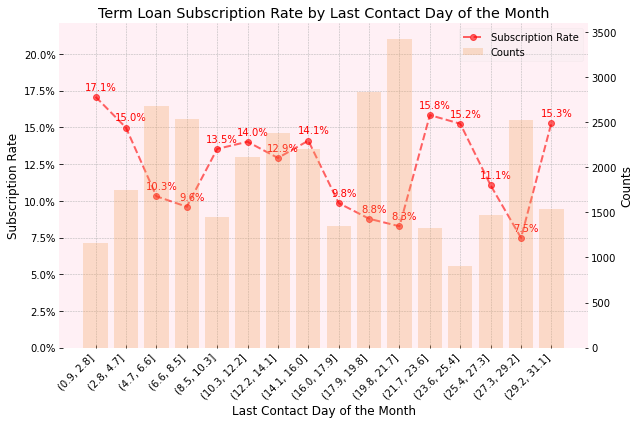

In [50]:
plot_default_cont_feat(data, 'day', "Last Contact Day of the Month", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


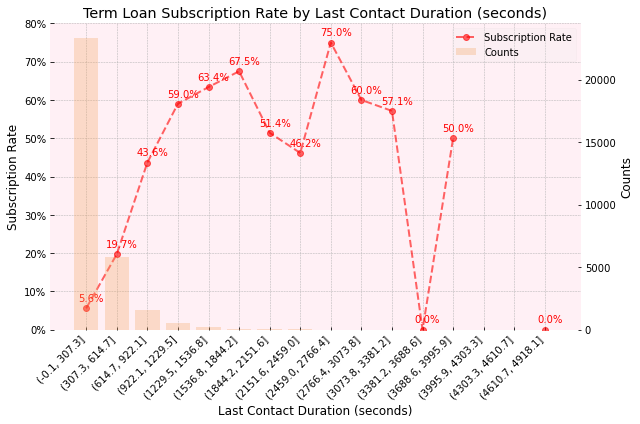

In [51]:
plot_default_cont_feat(data, 'duration', "Last Contact Duration (seconds)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


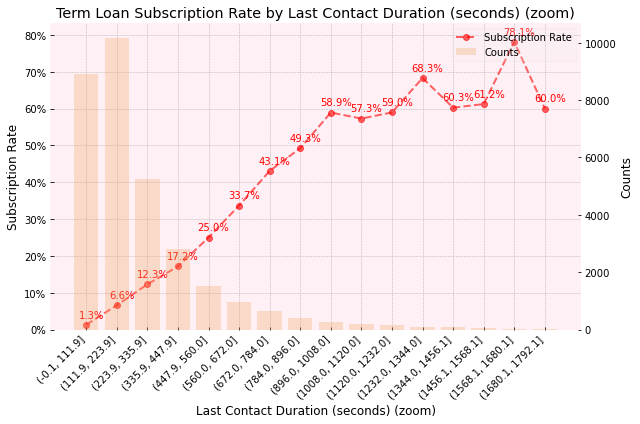

In [52]:
plot_default_cont_feat(data_dur, 'duration', "Last Contact Duration (seconds) (zoom)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


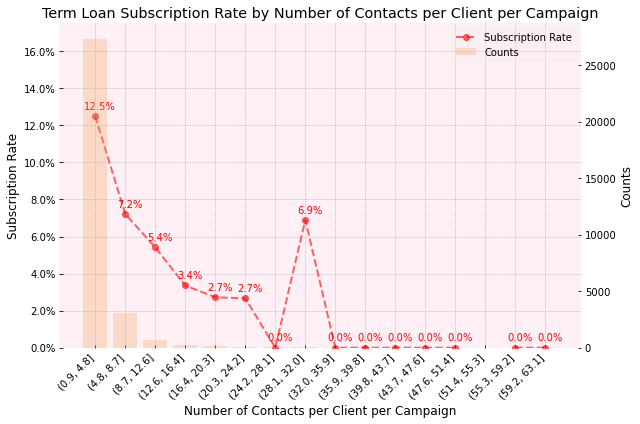

In [53]:
plot_default_cont_feat(data, 'campaign', "Number of Contacts per Client per Campaign", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


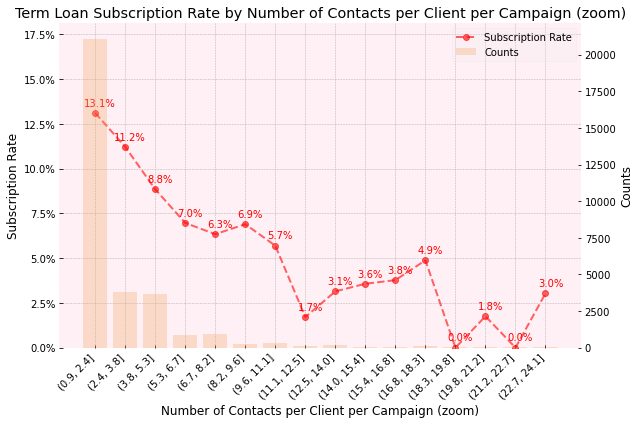

In [54]:
plot_default_cont_feat(data_cam, 'campaign', "Number of Contacts per Client per Campaign (zoom)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


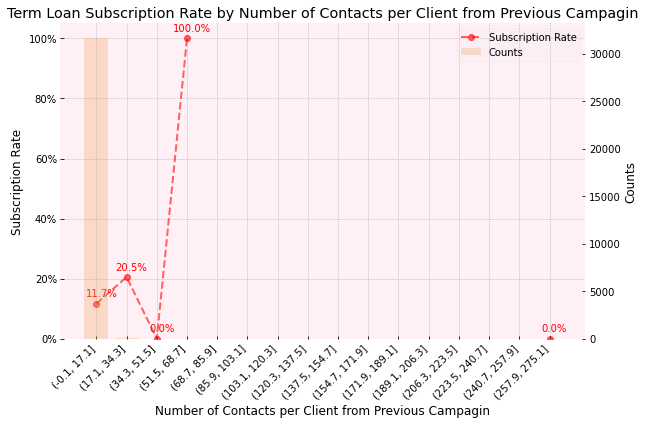

In [55]:
plot_default_cont_feat(data, 'previous', "Number of Contacts per Client from Previous Campagin", n = bins, pct_range = (0.0,1.0), decimals = 1)

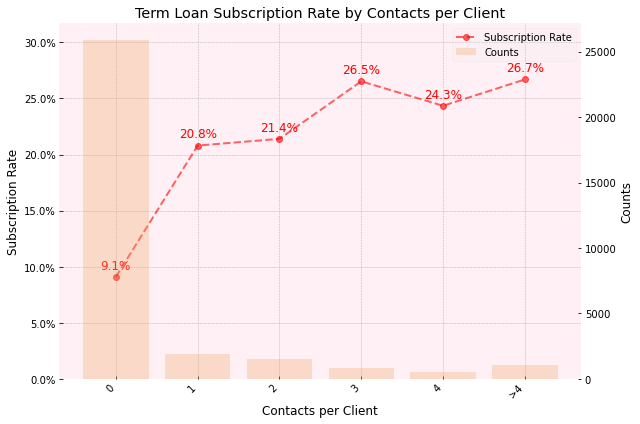

In [56]:
plot_default_cat_feat(data_pre, 'prev_cat', 'Contacts per Client')

### Heat map <a class="anchor" id="Heat Map"></a>

In [57]:
# original source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#this function is used for correlation between multi-level categorical features (non-binomial) and numerical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

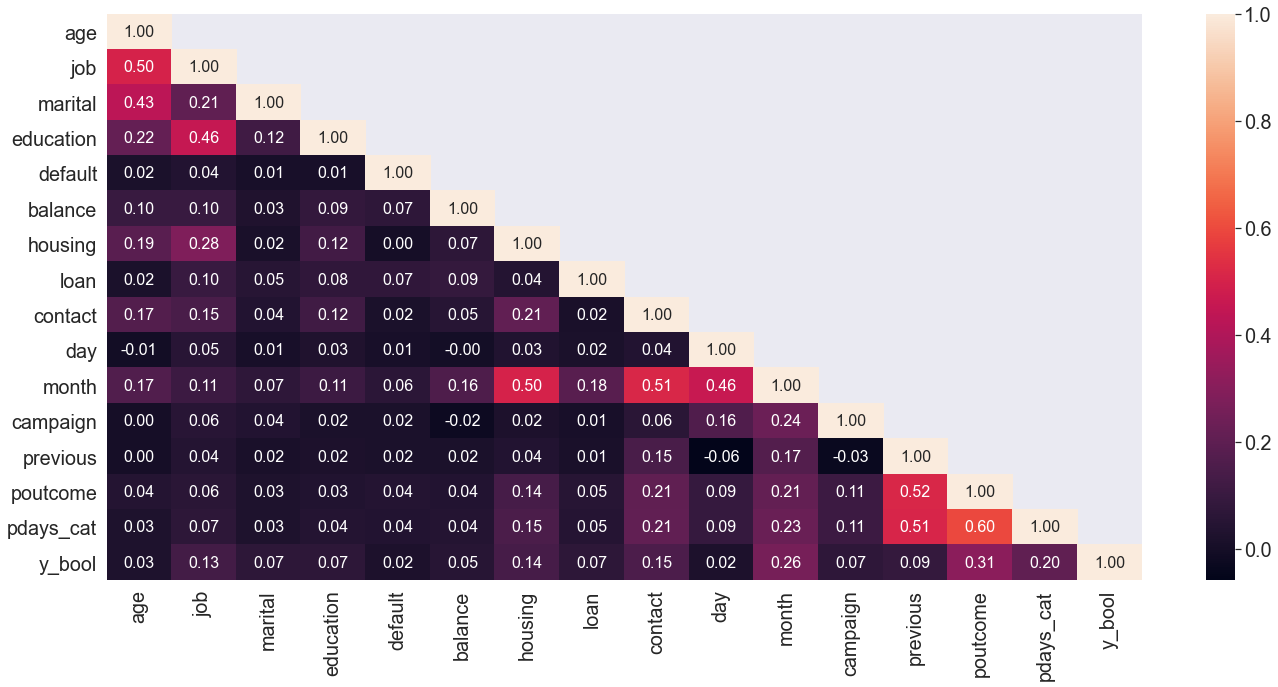

In [58]:
# initial source: https://github.com/ithisted/PetAdoptionPrediction/blob/master/PetAdoptionPrediction.ipynb

columns = data.columns
columns = columns.drop(['cust_id', 'age_cat', 'prev_cat', 'duration', 'age_pop'])
corr = pd.DataFrame(index=columns, columns=columns)

for i in range(0, len(columns)):
    for j in range(i, len(columns)):
        
            if i == j:
                corr_factor = 1.0
            
            elif (columns[i] in cat_col) and (columns[j] in cat_col):
                corr_factor =  cramers_v(data[columns[j]], data[columns[i]])
            
            elif (columns[i] in num_col) and (columns[j] in num_col):
                corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
            
            elif (columns[i] in num_col) and (columns[j] in cat_col):
                corr_factor =  correlation_ratio(data[columns[j]], data[columns[i]])
                
            elif (columns[i] in cat_col) and (columns[j] in num_col):
                corr_factor =  correlation_ratio(data[columns[i]], data[columns[j]])
                
            corr.loc[columns[j],columns[i]] = corr_factor
    
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,10))
sns.set(font_scale=1.8) 
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 16})
plt.tight_layout()
plt.savefig(p / ('heatmap.pdf') )
plt.show()    


### Feature Importance <a class="anchor" id="Feature_Importance"></a>

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Splitting target and features

df_train['random'] = np.random.random(size = df_train.shape[0]) #adding a random column for a baseline on feature importances
X = df_train[features]
y = df_train['y_bool']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [60]:
#https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
# need to encode features that are object types

features_to_encode = X_train.columns[X_train.dtypes==object].tolist()  

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [62]:
#instantiating a random forest classifier for the feature importance
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42,
                      max_features='auto')

In [63]:
X_train.head()

,age,balance,day,campaign,previous,job,marital,education,contact,month,poutcome,default,housing,loan,pdays_cat,random
4335,57,894,18,1,0,self-employed,married,tertiary,cellular,nov,unknown,no,yes,no,no contact,0.112341
29171,32,656,20,2,0,management,single,tertiary,cellular,apr,unknown,no,yes,yes,no contact,0.135191
16793,52,199,12,2,0,entrepreneur,divorced,tertiary,unknown,jun,unknown,no,yes,yes,no contact,0.214604
14077,33,0,11,7,0,management,single,tertiary,cellular,aug,unknown,no,no,no,no contact,0.227180
4550,46,245,8,1,3,entrepreneur,married,secondary,cellular,may,failure,no,yes,no,1 year,0.184043


In [64]:
y_train.head()

4335     0
29171    0
16793    0
14077    1
4550     0
Name: y_bool, dtype: int64

In [65]:
# making a pipeline to perform the feature importance model

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome',
                                                   'default', 'housing', 'loan',
                                                   'pdays_cat'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=50, n_estimators=150,
                                        n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [66]:
y_pred = pipe.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),4)*100} %")

The accuracy of the model is 89.66 %


In [68]:
train_probs = pipe.predict_proba(X_train)[:,1] 
probs = pipe.predict_proba(X_test)[:, 1]
train_predictions = pipe.predict(X_train)

In [69]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.8272837505675406
Test ROC AUC  Score: 0.7934295123123654


In [70]:
def evaluate_model(y_pred, probs,train_predictions, train_probs, title_name):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
        print(f'''{metric.capitalize()}
            Baseline: {round(baseline[metric], 2)}
            Test: {round(results[metric], 2)}
            Train: {round(train_results[metric], 2)}''')
            
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves: '+ title_name);
    plt.tight_layout()
    plt.savefig(p / (title +'.pdf') )
    plt.show();

Recall
            Baseline: 1.0
            Test: 0.15
            Train: 0.15
Precision
            Baseline: 0.11
            Test: 0.69
            Train: 0.72
Roc
            Baseline: 0.5
            Test: 0.79
            Train: 0.83


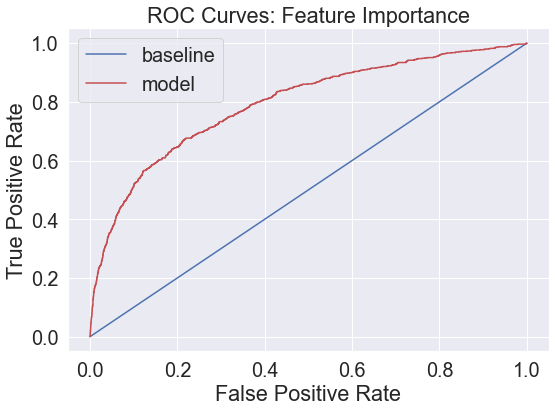

In [71]:
evaluate_model(y_pred,probs,train_predictions,train_probs, title_name="Feature Importance")

In [72]:
confusion_matrix(y_test, y_pred, normalize='all')

array([[0.87955005, 0.00758342],
       [0.09580384, 0.01706269]])

In [73]:
import itertools
#making a fancy plot for confusion matrix

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.tight_layout()
    plt.savefig(p / (title+'.pdf') )

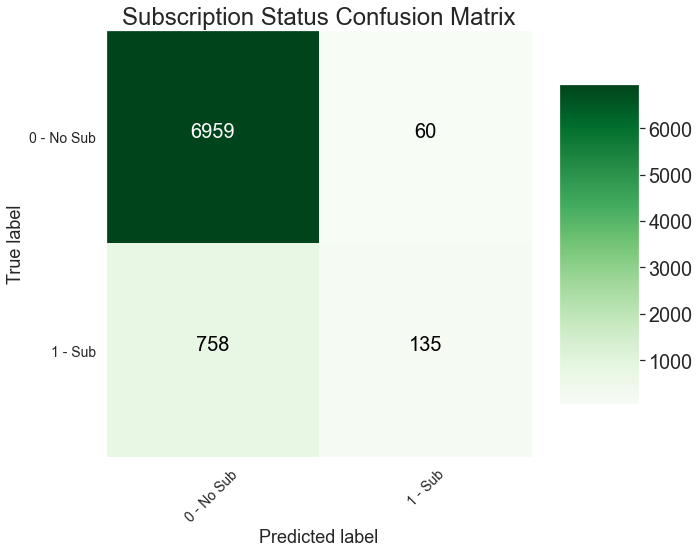

In [74]:
# Let's plot
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - No Sub', '1 - Sub'],
                      title = 'Subscription Status Confusion Matrix')

#### Random Forest Feature Importance Results <a class="anchor" id="Feature_Importance_Results"></a>

In [75]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[1.01722009e-03 2.95229990e-03 1.25443714e-04 1.66387101e-04
 2.35826120e-03 3.13553061e-03 2.41025053e-04 7.33823371e-04
 4.71381993e-03 1.73202823e-03 2.40316363e-04 0.00000000e+00
 1.27111472e-03 7.15031017e-03 7.32207522e-03 1.71412149e-03
 3.53747723e-03 7.54505893e-03 1.77764267e-04 2.31245668e-02
 2.01811389e-03 3.95384729e-02 3.07794062e-02 1.04850814e-02
 7.26224488e-04 2.91175848e-03 1.72557583e-03 6.55345566e-03
 1.18580623e-02 2.30111559e-02 1.03897796e-02 5.87373059e-03
 2.19725051e-02 2.02220934e-02 3.22527370e-02 1.31069224e-02
 2.29877697e-01 2.55890066e-02 1.25486693e-04 1.00575420e-04
 4.89450125e-02 4.14719538e-02 5.29485409e-03 5.01305279e-03
 9.27593131e-03 4.08749107e-02 1.86712140e-03 3.89289239e-02
 9.90650204e-02 3.78646394e-02 3.20596893e-02 1.85437427e-02
 4.12880676e-02 2.11305953e-02]
 There are 54 features in total


In [76]:
# Let's look at the first row
print(col_trans.fit_transform(X_train)[0,:])

  (0, 6)	1.0
  (0, 13)	1.0
  (0, 17)	1.0
  (0, 19)	1.0
  (0, 31)	1.0
  (0, 37)	1.0
  (0, 38)	1.0
  (0, 41)	1.0
  (0, 42)	1.0
  (0, 47)	1.0
  (0, 48)	57.0
  (0, 49)	894.0
  (0, 50)	18.0
  (0, 51)	1.0
  (0, 53)	0.11234127136653371


In [77]:
# And the first row of X_train
X_train.iloc[0,:]  

age                     57
balance                894
day                     18
campaign                 1
previous                 0
job          self-employed
marital            married
education         tertiary
contact           cellular
month                  nov
poutcome           unknown
default                 no
housing                yes
loan                    no
pdays_cat       no contact
random            0.112341
Name: 4335, dtype: object

In [78]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X_train, features_to_encode)

In [79]:
feature_importances = list(zip(X_train_encoded, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: poutcome_success                    Importance: 0.22987769659745813
Feature: age                                 Importance: 0.09906502041565694
Feature: housing_no                          Importance: 0.04894501253627839
Feature: housing_yes                         Importance: 0.04147195381164947
Feature: previous                            Importance: 0.04128806755342694
Feature: pdays_cat_3 months                  Importance: 0.040874910718388134
Feature: contact_unknown                     Importance: 0.03953847291301946
Feature: pdays_cat_no contact                Importance: 0.038928923937583425
Feature: balance                             Importance: 0.037864639438460905
Feature: poutcome_failure                    Importance: 0.03225273704268225
Feature: day                                 Importance: 0.03205968925695522
Feature: month_apr                           Importance: 0.03077940619712206
Feature: poutcome_unknown                    Importance: 0.02558900657753

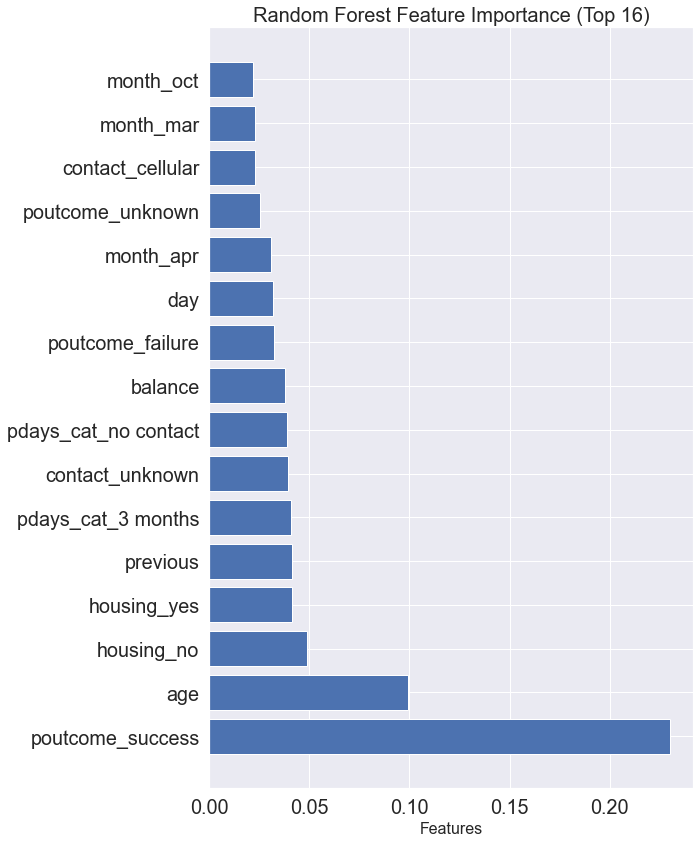

In [80]:
# Plot the top 15 feature importance
feature_names_15 = [i[0] for i in feature_importances_ranked[:16]]
y_ticks = np.arange(0, len(feature_names_15))
x_axis = [i[1] for i in feature_importances_ranked[:16]]
plt.figure(figsize = (10, 12))
plt.barh(feature_names_15, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 16)',
          fontdict= {'fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.tight_layout()
plt.savefig(p / ('Random Forest Feature Importance.pdf') )
plt.show()

## Model Selection   <a class="anchor" id="Model_Selection"></a>

### Random Forest Modeling <a class="anchor" id="Random_Forest_Model"></a>

In [81]:
from pprint import pprint
# looking at the parameters for the random forest classifier from the feature importance

print('Parameters currently in use:\n')
pprint(rf_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [82]:
from sklearn.model_selection import GridSearchCV
# establishing the grid for the random forest model

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 3)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_jobs' : [8], 
               'bootstrap': bootstrap}

In [83]:
# Evaluate Random Forest Model
# Create base model to tune
rf = RandomForestClassifier(oob_score=True)

pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [84]:
# Create random search model and fit the data
rf_grid = GridSearchCV(
                        estimator = rf,
                        param_grid = random_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
rf_grid.fit(X_train_encoded, y_train)
rf_grid.best_params_
rf_grid.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 50.1min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 275,
 'n_jobs': 8}

In [85]:
# Use the best model after tuning
best_rf_model = rf_grid.best_estimator_
pipe_best_rf_model = make_pipeline(col_trans, best_rf_model)
pipe_best_rf_model.fit(X_train, y_train)
y_pred_best_rf_model = pipe_best_rf_model.predict(X_test)
pprint(best_rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 275,
 'n_jobs': 8,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [86]:
# To look at nodes and depths of trees use on average
n_nodes = []
max_depths = []
for ind_tree in best_rf_model.estimators_:
       n_nodes.append(ind_tree.tree_.node_count)
       max_depths.append(ind_tree.tree_.max_depth)
print(f'Average number of nodes {int(np.mean(n_nodes))}')   
print(f'Average maximum depth {int(np.mean(max_depths))}') 

Average number of nodes 423
Average maximum depth 10


Recall
            Baseline: 1.0
            Test: 0.16
            Train: 0.19
Precision
            Baseline: 0.11
            Test: 0.67
            Train: 0.8
Roc
            Baseline: 0.5
            Test: 0.8
            Train: 0.84


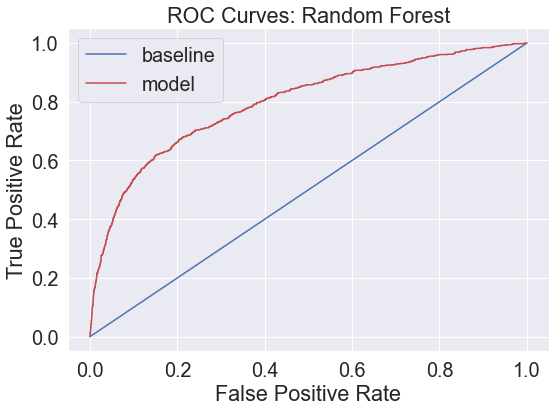

In [87]:
train_rf_predictions = pipe_best_rf_model.predict(X_train)
train_rf_probs = pipe_best_rf_model.predict_proba(X_train)[:, 1]
rf_probs = pipe_best_rf_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(y_pred_best_rf_model, rf_probs, train_rf_predictions, train_rf_probs,title_name="Random Forest")

In [88]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_rf_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, rf_probs)}')

Train ROC AUC Score: 0.8398007938516526
Test ROC AUC  Score: 0.7974959025789383


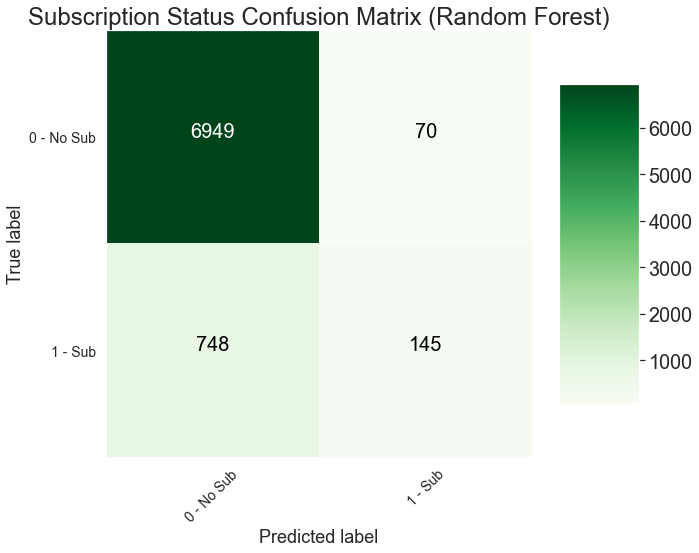

In [89]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_rf_model), classes = ['0 - No Sub', '1 - Sub'],
                      title = 'Subscription Status Confusion Matrix (Random Forest)')

### Logistic Regression Modeling <a class="anchor" id="Logistic_Regression_Model"></a>

In [90]:
#Testing Logistic Regression Model
#Using source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.linear_model import LogisticRegression

In [91]:
#same as above but using Logistic Regression

# Create base model to tune
lr = LogisticRegression()

pprint(lr.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [94]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(-4, 4, 50)
solver = ['liblinear']
max_iter = [1000]
grid_lr = {'penalty': penalty,
               'C': C,
               'max_iter': max_iter,
               'solver': solver}

In [95]:
# Create random search model and fit the data
lr_grid = GridSearchCV(
                        estimator = lr,
                        param_grid = grid_lr,
                        cv = 5,
                        verbose=1,  
                        scoring='roc_auc')
lr_grid.fit(X_train_encoded, y_train)
lr_grid.best_params_
lr_grid.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.4min finished


{'C': 0.12648552168552957,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}

{'C': 0.12648552168552957,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
Recall
            Baseline: 1.0
            Test: 0.17
            Train: 0.17
Precision
            Baseline: 0.11
            Test: 0.66
            Train: 0.67
Roc
            Baseline: 0.5
            Test: 0.78
            Train: 0.77


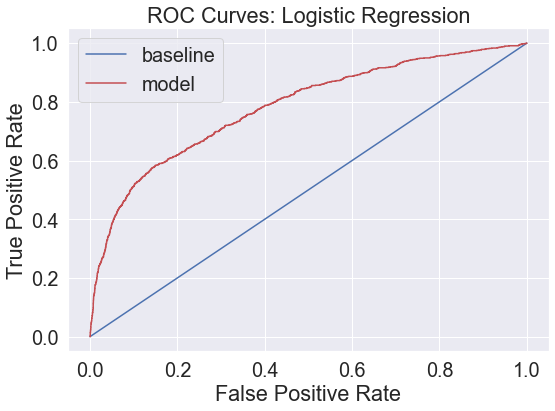

In [96]:
# Use the best model after tuning
best_lr_model = lr_grid.best_estimator_
pipe_best_lr_model = make_pipeline(col_trans, best_lr_model)
pipe_best_lr_model.fit(X_train, y_train)
y_pred_best_lr_model = pipe_best_lr_model.predict(X_test)
pprint(best_lr_model.get_params())

train_lr_predictions = pipe_best_lr_model.predict(X_train)
train_lr_probs = pipe_best_lr_model.predict_proba(X_train)[:, 1]
lr_probs = pipe_best_lr_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(y_pred_best_lr_model, lr_probs, train_lr_predictions, train_lr_probs, title_name="Logistic Regression")

In [97]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_lr_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, lr_probs)}')

Train ROC AUC Score: 0.7695008508284649
Test ROC AUC  Score: 0.7819551379259017


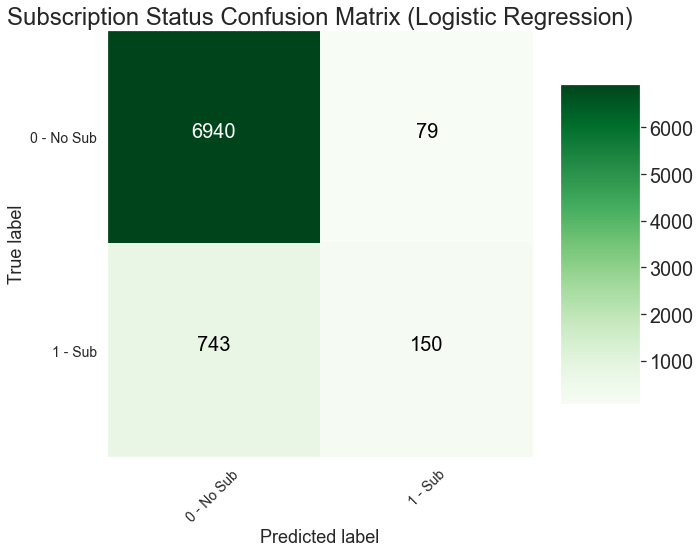

In [98]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_lr_model), classes = ['0 - No Sub', '1 - Sub'],
                      title = 'Subscription Status Confusion Matrix (Logistic Regression)')

### XGBoost Modeling <a class="anchor" id="XGBoost_Model"></a>

In [99]:
#Testing xgboost Model
#Using source: https://www.kaggle.com/phunter/xgboost-with-gridsearchcv
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [100]:
#same as above but using xgboost

# Create base model to tune
xgb_model = xgb.XGBClassifier()

pprint(xgb_model.get_params())

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': True,
 'validate_parameters': None,
 'verbosity': None}


In [101]:
xgb_param = {'nthread':[8], #when use hyperthread, xgboost may become slower
              'objective': ['binary:logistic'],
              'learning_rate': [0.01, 0.05, 0.1, 0.5], #so called `eta` value
              'max_depth': [4, 8, 12],
              'seed': [42],
              'n_estimators': [100, 500],
              'use_label_encoder': [False]
              }

In [102]:
# Create random search model and fit the data
xgb_grid = GridSearchCV(
                        estimator = xgb_model,
                        param_grid = xgb_param,
                        n_jobs = 4, 
                        cv = 5,
                        verbose=1,  
                        scoring='roc_auc')
xgb_grid.fit(X_train_encoded, y_train)
xgb_grid.best_params_
xgb_grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 13.0min finished


[13:39:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 100,
 'nthread': 8,
 'objective': 'binary:logistic',
 'seed': 42,
 'use_label_encoder': False}

[13:39:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'nthread': 8,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 42,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}
Recall
            Baseline: 1.0
        

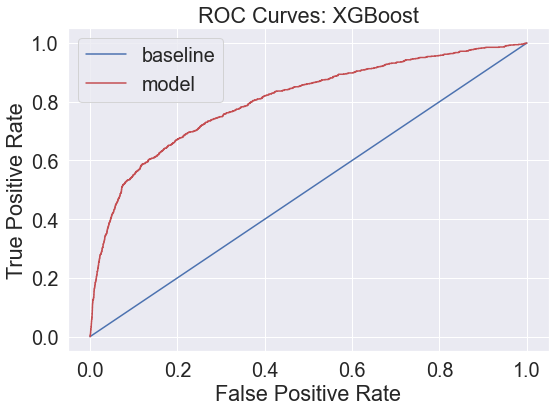

In [103]:
# Use the best model after tuning
best_xgb_model = xgb_grid.best_estimator_
pipe_best_xgb_model = make_pipeline(col_trans, best_xgb_model)
pipe_best_xgb_model.fit(X_train, y_train)
y_pred_best_xgb_model = pipe_best_xgb_model.predict(X_test)
pprint(best_xgb_model.get_params())

train_xgb_predictions = pipe_best_xgb_model.predict(X_train)
train_xgb_probs = pipe_best_xgb_model.predict_proba(X_train)[:, 1]
xgb_probs = pipe_best_xgb_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(y_pred_best_xgb_model, xgb_probs, train_xgb_predictions, train_xgb_probs, title_name="XGBoost")

In [104]:
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, xgb_probs)}')
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_xgb_probs)}')

Test ROC AUC  Score: 0.8037695476061057
Train ROC AUC Score: 0.8293597733873529


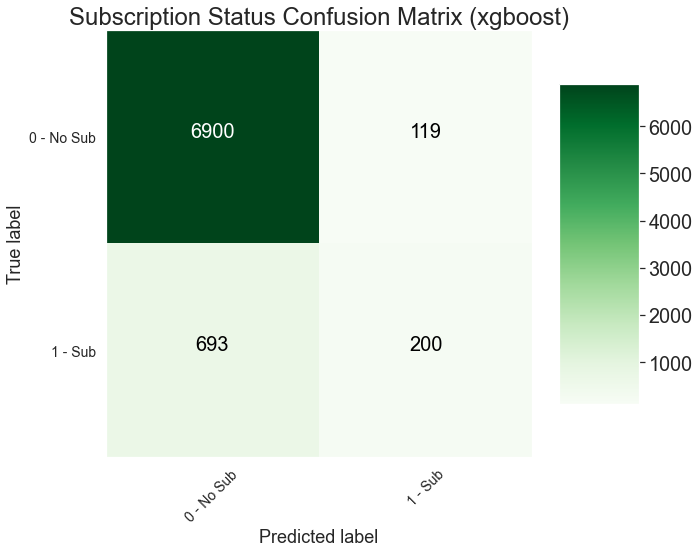

In [105]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_xgb_model), classes = ['0 - No Sub', '1 - Sub'],
                      title = 'Subscription Status Confusion Matrix (xgboost)')

## Determining profitability curve <a class="anchor" id="Determining_Profit_Curve"></a>

In [106]:
# Source: https://github.com/Esaslow/profit_curves/blob/master/src/functions.py

#create confusion  matrix
def standard_confusion_matrix(y_true,y_predict):
    tp = np.sum((y_predict == 1) & (y_predict == y_true))
    fp = np.sum((y_predict == 1) & (y_true == 0))
    fn = np.sum((y_predict == 0) & (y_true == 1))
    tn = np.sum((y_predict == 0) & (y_true == y_predict))
    confusion_matrix = np.array([[tp,fn],[fp,tn]])
    return confusion_matrix,fp,tp,fn #output both fn and tn too
    # """Make confusion matrix with format:
    #               -----------
    #               | TP | FP |
    #               -----------
    #               | FN | TN |
    #               -----------
    # Parameters
    # ----------
    # y_true : ndarray - 1D
    # y_pred : ndarray - 1D
    # Returns
    # -------
    # ndarray - 2D
    # """
    # [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    # return np.array([[tp, fp], [fn, tn]])

def profit_curve(cost_benefit, predicted_probs, labels):
    '''
    INPUTS:
    cost_benefit: your cost-benefit matrix
    predicted_probs: predicted probability for each datapoint (between 0 and 1)
    labels: true labels for each data point (either 0 or 1)
    OUTPUTS:
    array of profits and their associated thresholds
    '''
    idx = np.argsort(predicted_probs)
    predicted_probs= predicted_probs[idx]

    labels = labels[idx]
    pred_temp = np.zeros(len(labels))
    thresholds = set(predicted_probs)
    thresholds = np.insert(predicted_probs,0,0)

    cost = []
    for thresh in thresholds:

        pred_temp = np.zeros(len(labels))
        pred_temp[predicted_probs > thresh] = 1
        pred_temp[predicted_probs <= thresh] = 0
        conf, fpr,tpr,fnr= standard_confusion_matrix(np.array(labels),np.array(pred_temp)) #what conf? & fnr not included

        cost.append((fpr*cost_benefit[1][0])+(tpr*cost_benefit[0][0])+fnr*cost_benefit[0][1])


    return (np.array([cost,thresholds])), thresholds

def plot_profit_curve(model, cost_benefit, X_train, X_test, y_train, y_test,ax):
    model = model
    model.fit(X_train,y_train)
    test_probs = model.predict_proba(X_test)
    profits, thresholds = profit_curve(cost_benefit, test_probs[:,1], y_test.values)
    profits = list(reversed(profits[0,:]))
    p = np.linspace(0,len(profits)/8,len(profits))

    ax.plot(thresholds[::-1],profits,label=model.__class__.__name__)
    ax.grid(alpha = .4,color = 'r',linestyle = ':')
    ax.set_xlabel('Probability Threshold')
    ax.set_ylabel('Profit')
    ax.set_title('Profit Curves')
    return model.predict(X_test),profits,p, thresholds[::-1]

In [107]:
#### Define the Cost Matrix
cost_matrix = np.array([[139.61, -18.75], [ 0,   0]]).T

The percentage of correct classification for 
model: Pipeline is:  89.661 %
--------------------------------------------------
The percentage of correct classification for 
model: Pipeline is:  89.611 %
--------------------------------------------------
[13:39:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The percentage of correct classification for 
model: Pipeline is:  89.737 %
--------------------------------------------------


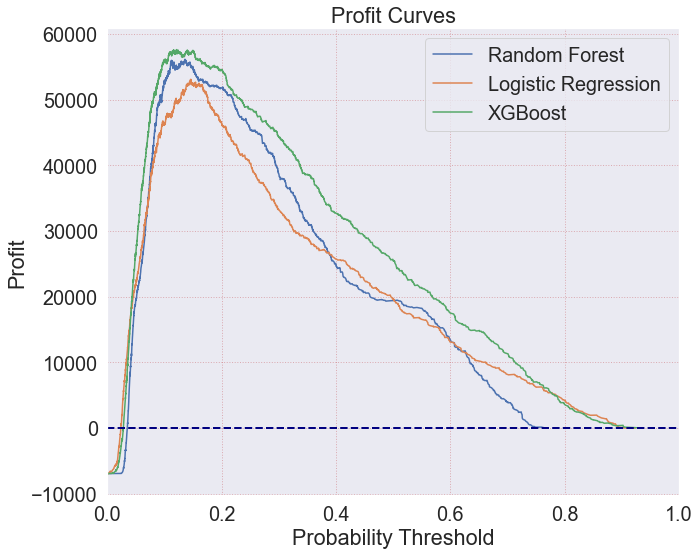

In [108]:
#Make the plot
_,ax = plt.subplots(1,1,figsize = (10,8))
models = [pipe_best_rf_model, pipe_best_lr_model, pipe_best_xgb_model]

#plot out the profit curve for each model
for model in models:
    m,profits,n, thresholds = plot_profit_curve(model, cost_matrix, X_train, X_test, y_train, y_test, ax)
    
    print('The percentage of correct classification for \nmodel:',
          model.__class__.__name__,
          'is: ',
          np.round(np.sum(m == y_test)/len(y_test)*100,3),
         '%')
    print('-'*50)

#Do some plotting stuff
ind = np.argmax(profits)
      
ax.plot([0, 1], [0, 0], color='navy', linestyle='--',
       lw = 2)

ax.legend(labels=['Random Forest', 'Logistic Regression', 'XGBoost']);
ax.set_xlim(0,1);
plt.tight_layout()
plt.savefig(p / ('ProfitCurve.pdf') )
plt.show()

In [109]:
# the threshold for the maximum profit and the maximum profit at that threshold
thresholds[ind], profits[ind].max()

(0.12149245, 57638.41)

### Summary <a class="anchor" id="Summary"></a>

Overall, each of the classification models used in this analysis were roughly equal in efficacy, with an ROC-AUC score of around 0.80. Based on this conclusion, each of these models would be able to reasonably predict the desired outcome of whether a client could subscribe to a term deposit. Using this data, a profit curve was generated looking at the goal percentage of subscriptions to maximize profits. The XGBoost optimized classification model performed the best out of the three models for the profitability curve.  It was seen that the maximum probability threshold value predicted was at 12.1% successful subscriptions of the client population.  

This data and the subsequent model posed an interesting question about trying to predict who would be likely to subscribe to a term deposit. However, this data was from over a decade ago at the time of writing. According to an article from Wharton Business School, Portugal had been suffering from a prolonged economic recession that started in 2003 and worsened in 2008 from the global financial crisis caused by the US banking crisis in 2007-2008. To recover from this recession, Portugal had been subjected by the International Monetary Fund and European Union economic austerity measures that may have influenced the ability and attitude of the Portuguese population to make financial decisions, including subscribing to term deposits. Comparing the data listed by Moro et. al. to other time windows both before 2008 and after 2010 could tease out if this subscription behavior is partially influenced by external economic factors within the Portuguese economy or the global economy at large. Additionally, considering inflation over periods of time for the net income for the term deposits could alter the profitability but increase complexity in the data analysis. 

In the exploratory data analysis above, external data about Portugal’s age demographics were included in the discussion comparing the client data and the general population at large. Alternatively, if more data about the job, education, marital status, etc. distribution for the general population of Portugal compared to the client data featured in this data set, there may be overarching differences in this population that chooses to bank with the source(s) of the data compared to the greater population of Portugal. This information may be useful to a broader analysis increasing the probability of successful subscriptions.

Lastly, additional profit loss could be determined by better anticipating the unrealized losses of the false negative client labels, customers who desired to subscribe to a term deposit but were not contacted. This loss in profit does not directly cost the bank money as no resources were used to pursue these clients. Yet these customers could offer a group that could be better marketed towards to increase subscriptions and future profits.